In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df =  pd.read_csv('data\OBRIO Test task data - tickets.csv')
df

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55,Fate,Team 1,Other,37,Unoffered
...,...,...,...,...,...,...,...
46866,378447,2024-05-01 0:06,Tracy,Team 3,Product 1,510,Offered
46867,378446,2024-05-01 0:05,Jeff,Team 3,Tech issue,380,Unoffered
46868,378445,2024-05-01 0:04,Dwight,Team 1,Product 1,90,Offered
46869,378444,2024-05-01 0:03,Charles,Team 3,Tech issue,305,Unoffered


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ticket_id           46871 non-null  int64 
 1   request_datetime    46871 non-null  object
 2   agent               46030 non-null  object
 3   agent_team          46871 non-null  object
 4   request_type        46871 non-null  object
 5   reply_time          46871 non-null  object
 6   satisfaction_score  46871 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


In [4]:
df["request_type"].unique()

array(['Product 1 ', 'Other', 'Empty', 'Tech issue', 'Product 2 ',
       'Non-customer', 'Email Marketing', 'Customer Success',
       'Personal data deletion', 'Feedback/suggestion'], dtype=object)

In [5]:
sizes = np.array([df.query('request_type == "{}"'.format(lebel)).shape[0] for lebel in df["request_type"].unique()])
sizes = sizes / sum(sizes)
sizes = sizes[:5]

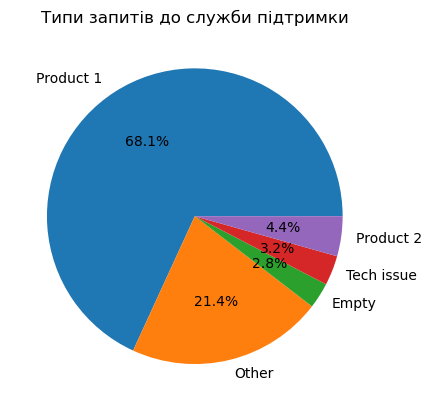

In [6]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["request_type"].unique()[:5], autopct='%1.1f%%')
plt.title("Типи запитів до служби підтримки")
plt.show()

In [7]:
time = {}
for t in df["request_datetime"]:
    t1 = pd.to_datetime(t).day
    time[t1] = 1 if t1 not in time else time[t1] + 1

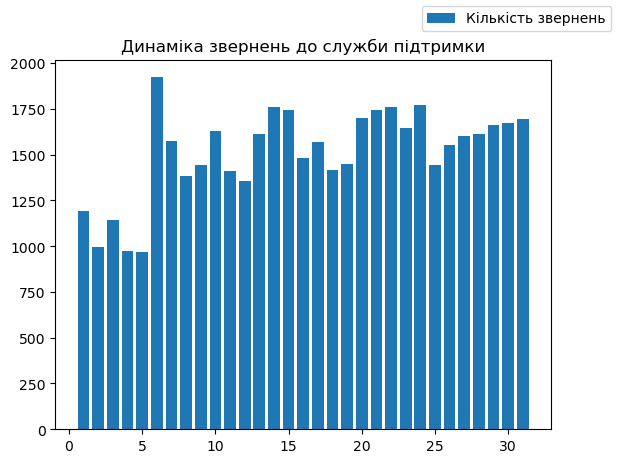

In [8]:
fig, ax = plt.subplots()
ax.bar(time.keys(), time.values())
fig.legend(["Кількість звернень"])
plt.title("Динаміка звернень до служби підтримки")
plt.show()

In [9]:
df["request_datetime"] = pd.to_datetime(df["request_datetime"])
df.head()

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59:00,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57:00,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56:00,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55:00,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55:00,Fate,Team 1,Other,37,Unoffered


In [10]:
df["agent_team"].unique()

array(['Team 1 ', ' ', 'Team 2 ', 'Team 3 '], dtype=object)

In [11]:
no_reply = df.query("agent_team == ' '")
no_reply

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
7,426974,2024-05-31 23:54:00,NaN,,Empty,,Unoffered
44,426932,2024-05-31 23:27:00,NaN,,Product 1,,Offered
70,426906,2024-05-31 23:11:00,NaN,,Empty,,Unoffered
89,426887,2024-05-31 23:00:00,NaN,,Product 1,,Offered
94,426882,2024-05-31 22:59:00,NaN,,Product 1,,Offered
...,...,...,...,...,...,...,...
46811,378504,2024-05-01 00:46:00,NaN,,Empty,,Offered
46815,378499,2024-05-01 00:43:00,NaN,,Empty,,Unoffered
46817,378496,2024-05-01 00:42:00,NaN,,Product 1,,Offered
46834,378479,2024-05-01 00:32:00,NaN,,Product 2,,Offered


In [12]:
no_reply.size / df.size

0.017942864457767063

In [13]:
df.drop(no_reply.index, inplace=True)

In [14]:
df["agent"].unique()

array(['Jim', 'Trevor', 'Fate', 'Dwight', 'Scott', 'Harry', 'Matheo',
       'Leo', 'Markus', 'Holly', 'Sophia', 'Orianna', 'Vito', 'Dan',
       'Zoe', 'Quentin', 'Irene', 'Dean', 'Max', 'Emma', 'Nathan',
       'Oscar', 'Jeff', 'John', 'Steve', 'Lisa', 'Tracy', 'James', 'Luc',
       'Lily', 'Eva', 'Dylan', 'Bella', 'Tina', 'Charles', 'Nicole',
       'Jessica', 'April', 'Goldie', 'Permanently deleted user'],
      dtype=object)

In [15]:
df.query("agent == 'Permanently deleted user'")

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
46690,378627,2024-05-01 02:22:00,Permanently deleted user,Team 3,Other,398,Unoffered


In [16]:
df["satisfaction_score"].unique()

array(['Unoffered', 'Offered', 'Good with Comment', 'Bad with Comment',
       'Good', 'Bad'], dtype=object)

In [193]:
sizes = np.array([df.query('satisfaction_score== "{}"'.format(lebel)).shape[0] for lebel in df["satisfaction_score"].unique()])
sizes = sizes / sum(sizes)
sizes = sizes

lebels = df["satisfaction_score"].unique()

In [198]:
sizes[1]

0.7455572452748208

Не пройшли опитування 92 відсотки

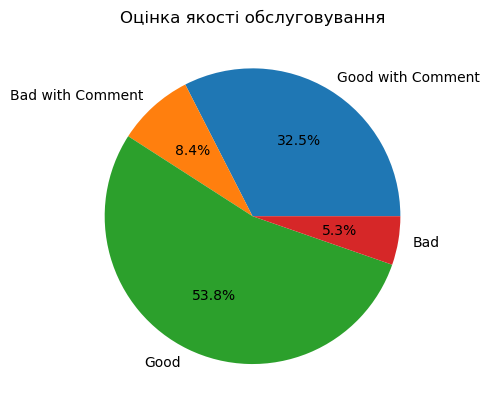

In [195]:
fig, ax = plt.subplots()
ax.pie(sizes[2:], labels=df["satisfaction_score"].unique()[2:], autopct='%1.1f%%')
plt.title("Оцінка якості обслуговування")
plt.show()

In [196]:
grades = sizes[2:]
grades = grades / sum(grades)

In [197]:
grades[0] + grades[2]

0.8629400698736899

Позитивних оцінок - 86%

In [201]:
df.query("reply_time > '90'").shape[0] / df.shape[0]

0.031240495329133176

In [205]:
df.query("reply_time > '90' and (satisfaction_score == 'Bad' or satisfaction_score == 'Bad with Comment')").shape[0] / df.query("reply_time > '90'").shape[0]

0.011126564673157162

In [87]:
sizes = np.array([df.query('agent_team== "{}"'.format(lebel)).shape[0] for lebel in df["agent_team"].unique()])
sizes = sizes * 100

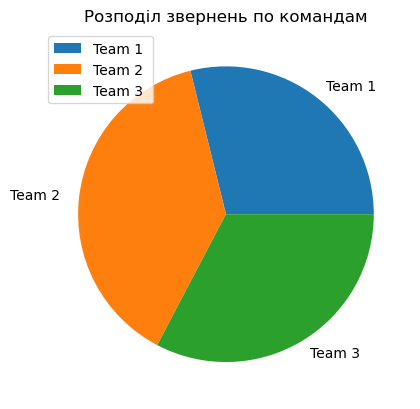

In [89]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["agent_team"].unique())
plt.title("Розподіл звернень по командам")
plt.legend()
plt.show()

In [90]:
sizes = np.array([df.query('agent== "{}"'.format(lebel)).shape[0] for lebel in df.query('agent_team== "{}"'.format('Team 1 '))["agent"].unique()])
lebels = df.query('agent_team== "{}"'.format('Team 1 '))["agent"].unique()
#sizes = sizes / sum(sizes)
sizes = sizes * 100
sizes

array([101900, 243300, 156200, 113300, 304000, 150100, 110100,  58300,
        91500])

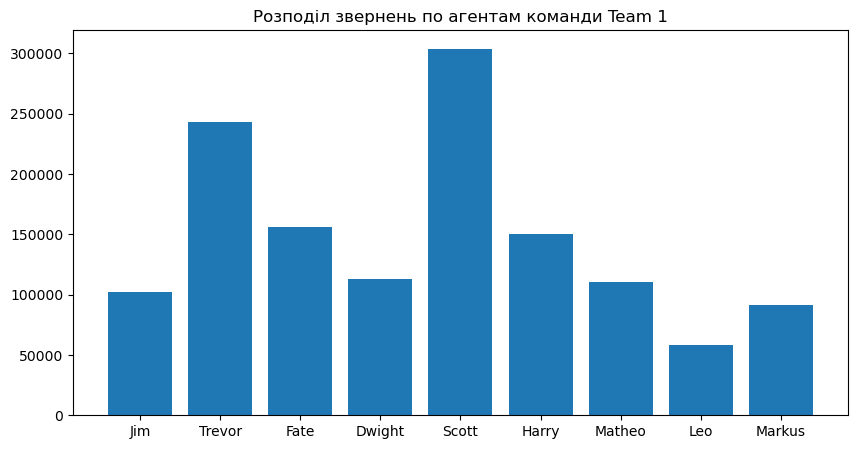

In [91]:
fig = plt.figure(figsize = (10, 5))
plt.bar(lebels, sizes)
plt.title("Розподіл звернень по агентам команди Team 1")
#plt.legend()
plt.show()

In [92]:
sizes = np.array([df.query('agent== "{}"'.format(lebel)).shape[0] for lebel in df.query('agent_team== "{}"'.format('Team 2 '))["agent"].unique()])
lebels = df.query('agent_team== "{}"'.format('Team 2 '))["agent"].unique()
#sizes = sizes / sum(sizes)
sizes = sizes * 100
sizes

array([106500,  94500,  70300,  86800, 103600, 125000, 117700,  24100,
       155100, 243600,  89100, 250000, 303000])

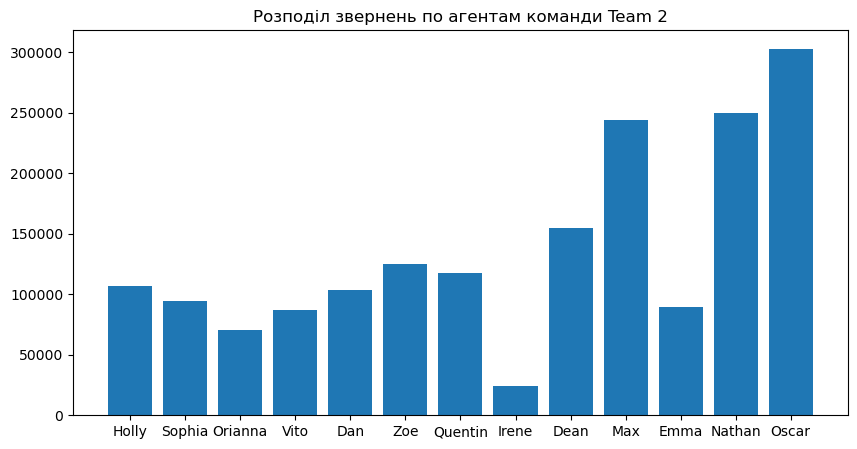

In [93]:
fig = plt.figure(figsize = (10, 5))
plt.bar(lebels, sizes)
plt.title("Розподіл звернень по агентам команди Team 2")
#plt.legend()
plt.show()

In [94]:
sizes = np.array([df.query('agent== "{}"'.format(lebel)).shape[0] for lebel in df.query('agent_team== "{}"'.format('Team 3 '))["agent"].unique()])
lebels = df.query('agent_team== "{}"'.format('Team 3 '))["agent"].unique()
#sizes = sizes / sum(sizes)
sizes = sizes * 100
sizes

array([174200,  77700, 149000,  99600,  54000,  86000, 141400, 130000,
       128000,  88300, 155100,  24300, 135300,   9600,   7600,  42200,
         2600,    100])

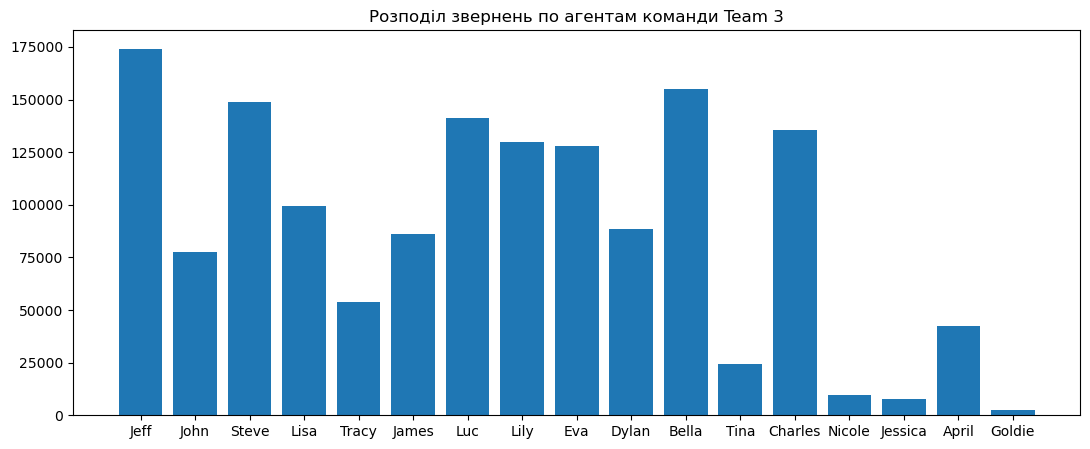

In [99]:
fig = plt.figure(figsize = (13, 5))
plt.bar(lebels[:-1], sizes[:-1])
plt.title("Розподіл звернень по агентам команди Team 3")
#plt.legend()
plt.show()

In [182]:
good_t1 = df.query(" agent_team == 'Team 1 'and (satisfaction_score== 'Good' or satisfaction_score== 'Good with Comment')").groupby("agent")["satisfaction_score"].count()
bad_t1 = df.query(" agent_team == 'Team 1 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()
good_t2 = df.query(" agent_team == 'Team 2 'and (satisfaction_score== 'Good' or satisfaction_score== 'Good with Comment')").groupby("agent")["satisfaction_score"].count()
bad_t2 = df.query(" agent_team == 'Team 2 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()
good_t3 = df.query(" agent_team == 'Team 3 'and (satisfaction_score== 'Good' or satisfaction_score== 'Good with Comment')").groupby("agent")["satisfaction_score"].count()
bad_t3 = df.query(" agent_team == 'Team 3 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()

In [185]:
stats1 =bad_t1 / (good_t1 + bad_t1)
stats1

agent
Dwight    0.109375
Fate      0.173554
Harry     0.109489
Jim       0.170455
Leo       0.210526
Markus    0.102273
Matheo    0.113636
Scott     0.167273
Trevor    0.125000
Name: satisfaction_score, dtype: float64

In [188]:
stats2 = bad_t2 / (good_t2 + bad_t2)
stats2

agent
Dan        0.126761
Dean       0.112069
Emma       0.101449
Holly      0.104167
Irene      0.222222
Max        0.166667
Nathan     0.141509
Orianna    0.037736
Oscar      0.160194
Quentin    0.189655
Sophia     0.062500
Vito       0.173913
Zoe        0.128205
Name: satisfaction_score, dtype: float64

In [189]:
stats3 = bad_t3 / (good_t3 + bad_t3)
stats3

agent
April      0.175000
Bella      0.258824
Charles    0.100840
Dylan      0.133333
Eva        0.142857
Goldie          NaN
James      0.035714
Jeff       0.122137
Jessica    0.166667
John       0.097222
Lily       0.161290
Lisa       0.131579
Luc        0.148148
Nicole          NaN
Steve      0.076336
Tina       0.111111
Tracy           NaN
Name: satisfaction_score, dtype: float64

In [191]:
sum(stats1>0.1) + sum(stats2>0.1) + sum(stats3>0.1)

31

In [192]:
sum(stats1<0.1) + sum(stats2<0.1) + sum(stats3<0.1)

5